<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/HypothesisB_ClimateZone_Energy_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🔍 Hypothesis B: Does Climate Zone Affect County-Level Energy Usage?

We test whether counties in different DOE climate zones have significantly different average energy usage using a **one-way ANOVA**.


ANOVA F-statistic: 5.8234, p-value: 0.0000
✅ Statistically significant difference in energy use between climate zones.


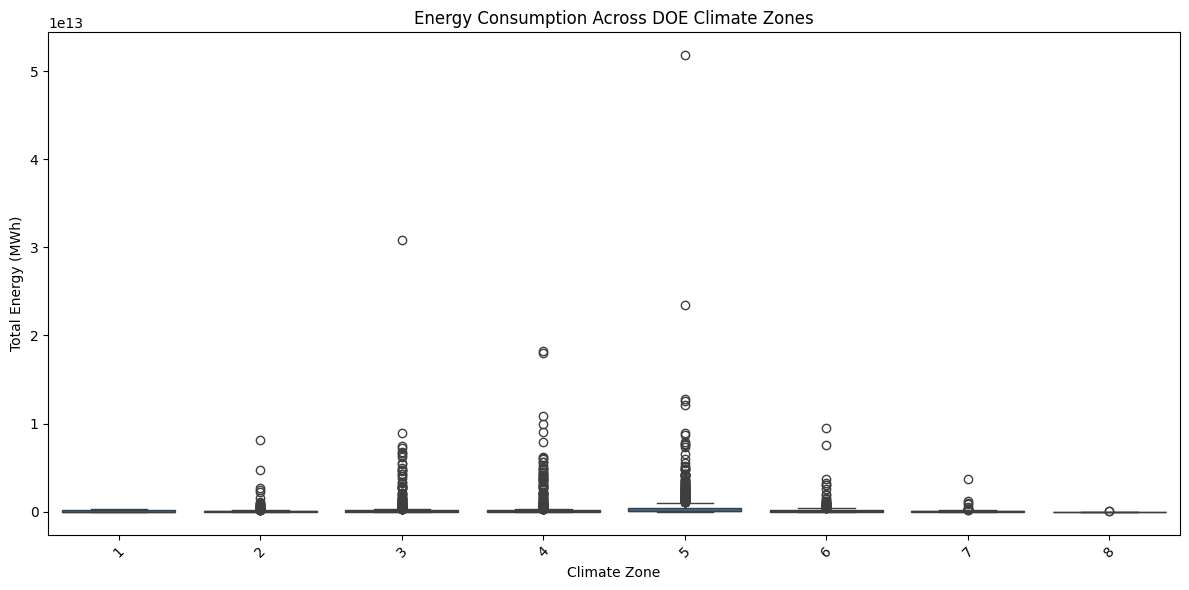

In [1]:

!pip install pyxlsb

import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
county_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='County', skiprows=1)
county_data.columns = county_data.iloc[2]
county_data = county_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract relevant columns
mwh_index = list(county_data.columns).index('consumption (MWh)')
tcf_index = list(county_data.columns).index('consumption (TcF)')

county_df = pd.DataFrame()
county_df['climate_zone'] = county_data['doe_climate_zone']
county_df['electricity_MWh'] = pd.to_numeric(county_data.iloc[:, mwh_index], errors='coerce')
county_df['natural_gas_TcF'] = pd.to_numeric(county_data.iloc[:, tcf_index], errors='coerce')
county_df['total_energy_MWh'] = county_df['electricity_MWh'] + county_df['natural_gas_TcF'] * 293071

# Clean
county_df.dropna(subset=['climate_zone', 'total_energy_MWh'], inplace=True)

# Group for ANOVA
grouped_data = [
    group['total_energy_MWh'].values
    for _, group in county_df.groupby('climate_zone') if len(group) > 1
]

# One-way ANOVA
f_stat, p_val = f_oneway(*grouped_data)

print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Statistically significant difference in energy use between climate zones.")
else:
    print("❌ No significant difference in energy use between climate zones.")

# Boxplot visualization
plt.figure(figsize=(12, 6))
top_zones = county_df['climate_zone'].value_counts().index
sns.boxplot(data=county_df[county_df['climate_zone'].isin(top_zones)],
            x='climate_zone', y='total_energy_MWh')
plt.title("Energy Consumption Across DOE Climate Zones")
plt.xlabel("Climate Zone")
plt.ylabel("Total Energy (MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## ✅ Conclusion

This test checks whether energy usage varies by DOE climate zones.

- If the **p-value < 0.05**, there is a **statistically significant** difference in average energy usage between zones.
- This can inform **energy planning and climate-specific policy design**.
